## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with AG News Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

In [ ]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
nltk.download('punkt')
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from tqdm import tqdm
import math
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The ag news dataset comprises around 18000 news text in 4 categories.

In [ ]:
# Read the csv file agnews.csv
mydata_train = pd.read_csv('/content/drive/MyDrive/agnews.csv')
#for testing purposes
#mydata_train = pd.read_csv('agnews.csv')

In [ ]:
# Print the news categories in the dataset
print(list(mydata_train.ClassIndex))

[1, 1, 1, 1, 2, 2, 1, 1, 3, 4, 2, 4, 4, 3, 2, 2, 4, 3, 4, 4, 3, 3, 2, 1, 2, 3, 2, 2, 4, 4, 2, 1, 2, 4, 1, 1, 1, 1, 2, 1, 1, 3, 3, 4, 2, 2, 3, 3, 2, 1, 3, 1, 4, 1, 1, 2, 1, 1, 1, 4, 4, 1, 2, 1, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 4, 4, 4, 3, 4, 1, 2, 1, 4, 2, 3, 1, 1, 2, 4, 4, 4, 4, 4, 2, 1, 4, 4, 2, 1, 1, 3, 1, 1, 3, 1, 2, 2, 3, 4, 2, 4, 4, 4, 1, 3, 1, 3, 1, 3, 1, 3, 2, 4, 1, 1, 4, 1, 2, 4, 3, 1, 4, 2, 1, 3, 3, 3, 4, 1, 3, 3, 2, 1, 3, 3, 2, 4, 4, 2, 3, 4, 3, 1, 3, 3, 2, 3, 1, 1, 2, 2, 2, 4, 3, 2, 2, 3, 1, 3, 3, 2, 2, 3, 1, 2, 4, 1, 1, 3, 3, 2, 4, 3, 3, 1, 3, 2, 2, 1, 3, 4, 1, 2, 1, 3, 2, 1, 2, 1, 4, 1, 1, 3, 3, 3, 2, 3, 2, 4, 2, 2, 2, 1, 1, 3, 1, 2, 4, 4, 2, 3, 2, 2, 3, 2, 1, 3, 3, 2, 4, 2, 1, 4, 1, 1, 1, 4, 1, 1, 3, 4, 2, 3, 1, 3, 2, 4, 3, 3, 1, 3, 2, 4, 4, 4, 2, 1, 1, 1, 2, 3, 4, 1, 2, 3, 2, 1, 4, 2, 2, 3, 4, 3, 3, 3, 3, 4, 2, 1, 1, 3, 3, 2, 3, 4, 3, 3, 4, 3, 4, 1, 2, 2, 4, 4, 4, 3, 1, 4, 4, 4, 4, 2, 3, 3, 3, 4, 1, 3, 4, 4, 1, 1, 4, 3, 2, 3, 4, 3, 2, 3, 3, 2, 3, 4, 2, 4, 3, 3, 1, 

In [ ]:
# What is the type of 'mydata_train'
print(type(mydata_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Check the length of the data
print(len(mydata_train.ClassIndex))
print(len(mydata_train.Description))
print(mydata_train.Description)

18000
18000
0        AFP - Raspy-voiced British Rock star Rod Stewa...
1        A World Food Programme survey says almost half...
2        ROME : A top Italian official leaves for the M...
3        AFP - As many as five million deaths are cause...
4        Sir Alex Ferguson is convinced Manchester Unit...
                               ...                        
17995    Clinton Portis ran 64 yards for a touchdown an...
17996    SPACE.com - Astronomers have produced the firs...
17997    Indianapolis Motor Speedway president Tony Geo...
17998    IBM plans to announce Monday that it will cont...
17999    South Korea #39;s Grace Park shot a seven-unde...
Name: Description, Length: 18000, dtype: object


### Expected Output: 
18000

18000


## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref: 6.5 TF-IDF: Weighing terms in the vector section of Dan Jurafsky book
https://web.stanford.edu/~jurafsky/slp3/6.pdf

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [ ]:
text = mydata_train.Description
print(text)

0        AFP - Raspy-voiced British Rock star Rod Stewa...
1        A World Food Programme survey says almost half...
2        ROME : A top Italian official leaves for the M...
3        AFP - As many as five million deaths are cause...
4        Sir Alex Ferguson is convinced Manchester Unit...
                               ...                        
17995    Clinton Portis ran 64 yards for a touchdown an...
17996    SPACE.com - Astronomers have produced the firs...
17997    Indianapolis Motor Speedway president Tony Geo...
17998    IBM plans to announce Monday that it will cont...
17999    South Korea #39;s Grace Park shot a seven-unde...
Name: Description, Length: 18000, dtype: object


## Preprocessing the Corpus

In [ ]:
# Preprocessing the data
lines = [] 
word_list = [] 
 
for line in text:
    #tokenize the text documents and update the lists word_list and lines
    words = [word.lower() for word in nltk.word_tokenize(line) if word.isalpha()]
    lines+=[words]
    for word in words:
      if word not in word_list:
        word_list+=[word]

# Make sure the word_list contains unique tokens
word_list = set(word_list)
# Calculate the total documents present in the corpus
total_docs = len(text) 
#Create a dictionary to keep track of index of each word
dict_idx = {}
for i, word in enumerate(word_list):
  dict_idx[word] = i 

In [ ]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = {}
    #word_list=list(set(f(lines)))
    for word in word_list:
      # f = lambda *n: (e for a in n for e in (f(*a) if isinstance(a, (tuple, list)) else (a,)))
      freq_word[word] = 0
    for line in tqdm(lines):
      for word in line:
        freq_word[word] +=1
    return freq_word

In [ ]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

100%|██████████| 18000/18000 [00:00<00:00, 129935.74it/s]


In [ ]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    N= len(document)
    occurence = len([token for token in document if token == word])
    tf = occurence / N 
    return tf

In [ ]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    try: 
      word_occurence = freq_word[word] + 1
    except:
      word_occurence = 1
    idf = np.log(total_docs / word_occurence)    
    return idf

In [ ]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = np.zeros((len(word_list),))
    for word in sentence:
      tf = term_frequency(sentence, word)
      idf = inverse_df(word)
      tf_idf_vec[dict_idx[word]]= tf * idf
    return tf_idf_vec

In [ ]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus
vectors = []
for sent in tqdm(lines):
    vectors.append(tfidf(sent))
print(vectors)

100%|██████████| 18000/18000 [00:04<00:00, 3642.21it/s]


[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 

## Multinomial Naive Bayes (10 Points)

In [ ]:
#Fit a Multinomial Naive Bayes Model on our dataset
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
vectors = scaler.fit_transform(vectors)
mb = MultinomialNB()
mb.fit(vectors,mydata_train.ClassIndex)

MultinomialNB()

In [ ]:
#Perform testing on the train dataset
pred = mb.predict(vectors)
pred

array([1, 1, 1, ..., 2, 4, 2])

In [ ]:
#Calculate the F1 Score and the Accuracy
F1_score = f1_score(mydata_train.ClassIndex, pred, average='weighted')
Accuracy = accuracy_score(mydata_train.ClassIndex, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.9364925872327804
Accuracy:  0.9365555555555556


### Expected Output:
F1 Score: 0.9604092771164052

Accuracy: 0.9604444444444444


Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [ ]:
# install libraries
%pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wikipedia
from wikipedia.exceptions import WikipediaException
import random

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''
# selected topics
topics = ["Machine Learning","Artificial Intelligence","Robotics","Djokovic","Federer","Nadal","Orthodontist","Dentistry","Teeth"]

# list of articles to be downloaded
articles = []
for topic in topics:
  articles += wikipedia.search(topic, results = 3)

# download and store articles (summaries) in this variable
data = []
for article in articles:
    try:
        data.append(wikipedia.summary(article,auto_suggest=False,redirect=True))
    except wikipedia.exceptions.DisambiguationError as e:
        s = random.choice(e.options)
        p = wikipedia.summary(s)
        data+=[p]
print(data)
# print(len(data))
groups = [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3]

['Machine learning (ML) is a field of inquiry devoted to understanding and building methods that "learn" – that is, methods that leverage data to improve performance on some set of tasks. It is seen as a part of artificial intelligence. \nMachine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so. Machine learning algorithms are used in a wide variety of applications, such as in medicine, email filtering, speech recognition, agriculture, and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers, but not all machine learning is statistical learning. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a

### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.


**Answer(1-3 sentences):** 


I'm not choosing to clean the data as I noticed that the articles cluster better together without data cleaning. I believe that clustering is done better with more information, when many of the words are removed, there is not much to work with to cluster the articles. By the principle of TF-IDF, the more frequent a word is within a document, reduces its ability to be informative. Hence if we keep all the words as is, without removal, TF-IDF will do its job with the given information, marking freqent and infrequent words as less informative. Ultimately, allowing the TSNE model to cluster the articles together better. 

In [ ]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
from nltk.stem import porter
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def clean_message(messages):
  messages_cleaned = []
  lemmatizer = WordNetLemmatizer()
  for message in messages:
    translator = str.maketrans('','',string.punctuation)
    message = message.translate(translator)   ## Removing puctuations using string library
    message = re.sub(r'https?:\/\/\S*','',message) ## using presence of any link starting with http or https
    message = re.sub(r'RT','',message) ## Removing any messages starting with RT
    message = re.sub(r'$[a-zA-Z]*','',message) 
    message = message.strip() ## removing space from the messages
    message_tokens = word_tokenize(message) ## tokenizing the messages into words
    messages=[]
    for word in message_tokens:
      if lemmatizer.lemmatize(word) not in message_tokens: 
        m=lemmatizer.lemmatize(word)
        messages.append(m)
    print(messages)
    messages_cleaned.append(messages)
  return messages_cleaned

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# data=clean_message(data)
# data

In [ ]:
# len(data)

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [ ]:
# "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in data]).strip()
# def untokenize(data):
#     for tokens in data:
#         yield ' '.join(tokens)
# data = untokenize(data)
# print(data)

vectorizer = TfidfVectorizer(lowercase=False)
X = vectorizer.fit_transform(data)

In [ ]:
print(np.argsort(X.toarray(),axis=-1)[0,:20])

[   0 1382 1380 1379 1378 1377 1376 1375 1374 1373 1371 1370 1369 1368
 1367 1366 1365 1364 1363 1362]


In [ ]:
# myKeys = list(myDict.keys())
# myKeys.sort()
# sorted_dict = {i: myDict[i] for i in myKeys}
sorted(vectorizer.vocabulary_,key=lambda x: x[1])[1395]

'movements'

In [ ]:
print(X.shape)

(27, 2105)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [ ]:
from sklearn.manifold import TSNE

# call TSNE() to fit the data
tsne = TSNE(n_components=2,init='random', perplexity=10).fit_transform(X)
tsne.shape
print(tsne)
print(groups)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[ 176.42494    144.11551  ]
 [ 219.55104    106.1119   ]
 [ 129.07016    114.21467  ]
 [ -24.719841  -271.31696  ]
 [ -48.50146   -316.30914  ]
 [-337.73993     16.466305 ]
 [  34.34992   -154.28586  ]
 [  77.12675   -126.03709  ]
 [  91.02905    -59.89401  ]
 [-180.23158    -99.14354  ]
 [-149.7151     121.56649  ]
 [-131.35297     39.867107 ]
 [-132.16605   -152.7651   ]
 [-199.34055    101.20715  ]
 [-195.88232     -3.0880032]
 [-113.992645   -91.49829  ]
 [ -23.775265     8.541229 ]
 [-114.22372     -7.411544 ]
 [ 168.98769   -242.04175  ]
 [ 154.49525   -303.02072  ]
 [ -65.922226   233.44637  ]
 [ 222.78365   -189.03085  ]
 [ 283.178     -261.7853   ]
 [ 307.05237   -200.06917  ]
 [ 180.2962    -139.68016  ]
 [-271.6967    -107.05581  ]
 [-383.1933     -14.370783 ]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]


Plot and annotate the points with different markers for different expected groups.

In [ ]:
# import matplotlib.pyplot as plt
import plotly.express as px
fig = px.scatter(x=
     tsne[:,0],y=tsne[:,1], color=groups, labels={'color':'groups'})
fig.show()


**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  

The T-SNE model clusters the 3 different categories of articles pretty well. The Red, Blue, and Yellow colors exemplify the true category of the articles. As you can see above, similar color points are in close proximity to each other, which means the T-SNE model worked well.
  


# Question 3. Building Multinomial Naive Bayes and Neural Networks on Countvectors

### We are gonna use Disaster Tweets Datasset for this task. We need to Predict which Tweets are about real disasters and which ones are not.

### We are providing data.csv file along with this notebook. 

### Library Imports and Utility functions

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [ ]:
# Import the data.csv only use 'text' and 'target' columns
data = pd.read_csv('/content/drive/MyDrive/data-1.csv')
#For testing purposes
#data = pd.read_csv('data-1.csv')
data =data[['text', 'target']]
X=data[['text']]

In [ ]:
# and printout the train.shape and validation.shape 

# expected shape of dataset is (7613, 2)
print(data.shape)
X=X.values.tolist()

(7613, 2)


In [ ]:
# clean the text in the dataframe using the clean_text function provided above
message=[]
# messages=[]
# for lists in X:
#   print(lists)
for sentence in X:
  # ' '.join(sentence)
  # print(' '.join(sentence))
  message+=[clean_text(' '.join(sentence))]


In [ ]:
# initialise count vectorizer from sklearn module with default parameter
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# fit and transform on dataset
X = vectorizer.fit_transform(message)
print(X)

  (0, 4154)	1
  (0, 11852)	1
  (0, 4867)	1
  (0, 9221)	1
  (0, 1104)	1
  (0, 5890)	1
  (1, 5881)	1
  (1, 5706)	1
  (1, 9987)	1
  (1, 8379)	1
  (1, 12364)	1
  (1, 12633)	1
  (1, 2761)	1
  (2, 12104)	1
  (2, 1525)	1
  (2, 12994)	2
  (2, 11101)	2
  (2, 10245)	1
  (2, 10396)	1
  (2, 5279)	1
  (2, 10579)	1
  (2, 5369)	1
  (3, 5279)	1
  (3, 10579)	1
  (3, 138)	1
  :	:
  (7610, 8963)	1
  (7610, 6777)	1
  (7610, 6)	1
  (7610, 15287)	1
  (7611, 2817)	1
  (7611, 11192)	1
  (7611, 12223)	1
  (7611, 7541)	1
  (7611, 8718)	1
  (7611, 12882)	1
  (7611, 7658)	1
  (7611, 14516)	1
  (7611, 3391)	1
  (7611, 4889)	2
  (7611, 11243)	1
  (7611, 13931)	1
  (7611, 10188)	1
  (7612, 15819)	1
  (7612, 2720)	1
  (7612, 7040)	1
  (7612, 10058)	1
  (7612, 8459)	1
  (7612, 10217)	1
  (7612, 758)	1
  (7612, 11798)	1


In [ ]:
# get the values of target column
y = data[['target']]

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):
  model = tf.keras.models.Sequential()
  # layer 1 : input layer

  model.add(tf.keras.Input((X.shape[1],)))

  # layer 2 : add the dense layer with 64 units and relu activation

  model.add(tf.keras.layers.Dense(64, activation='relu'))

  # layer 3 : add the dropout layer with dropout rate of 0.5
  
  model.add(tf.keras.layers.Dropout(0.5))

  # layer 4 : add the dense layer with 32 units with tanh activation and with l2 regularization

  model.add(tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer='l2'))

  # layer 5 : add the dropout layer with dropout rate of 0.5

  model.add(tf.keras.layers.Dropout(0.5))

  # layer 6 : add the dense layer with 16 units with tanh activation and with l2 regularization

  model.add(tf.keras.layers.Dense(16, activation='tanh', kernel_regularizer='l2'))

  # layer 7 : add the dropout layer with dropout rate of 0.5

  model.add(tf.keras.layers.Dropout(0.5))

  # layer 8 : output layer with units equal to 1 and activation as sigmoid

  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # use loss as binary crossentropy, optimizer as rmsprop and evaluate model on auc 

  model.compile(loss='binary_crossentropy', optimizer='rmsprop')

  return model


Epoch 1/5
381/381 [==============================] - 12s 28ms/step - loss: 0.7839
Epoch 2/5
381/381 [==============================] - 20s 53ms/step - loss: 0.5013
Epoch 3/5
381/381 [==============================] - 8s 21ms/step - loss: 0.4317
Epoch 4/5
381/381 [==============================] - 7s 18ms/step - loss: 0.4000
Epoch 5/5
48/48 [==============================] - 0s 8ms/step


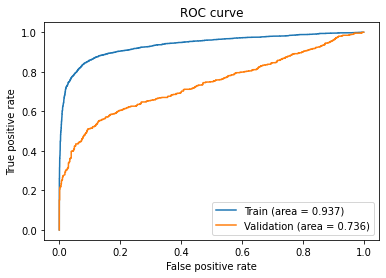

Epoch 1/5
381/381 [==============================] - 7s 16ms/step - loss: 0.7767
Epoch 2/5
381/381 [==============================] - 6s 15ms/step - loss: 0.4749
Epoch 3/5
381/381 [==============================] - 6s 16ms/step - loss: 0.4163
Epoch 4/5
381/381 [==============================] - 7s 17ms/step - loss: 0.3825
Epoch 5/5
48/48 [==============================] - 0s 6ms/step


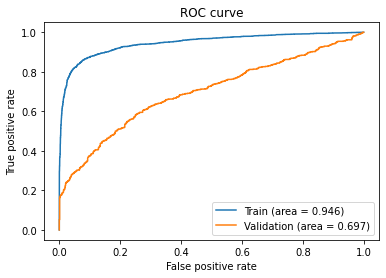

Epoch 1/5
381/381 [==============================] - 7s 15ms/step - loss: 0.7940
Epoch 2/5
381/381 [==============================] - 6s 14ms/step - loss: 0.4803
Epoch 3/5
381/381 [==============================] - 7s 18ms/step - loss: 0.4132
Epoch 4/5
381/381 [==============================] - 6s 14ms/step - loss: 0.3832
Epoch 5/5
48/48 [==============================] - 0s 7ms/step


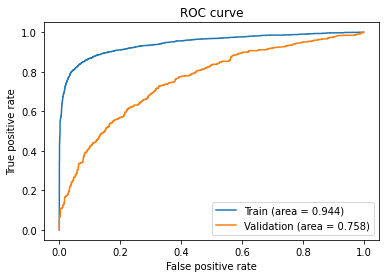

Epoch 1/5
381/381 [==============================] - 8s 18ms/step - loss: 0.7718
Epoch 2/5
381/381 [==============================] - 7s 17ms/step - loss: 0.4886
Epoch 3/5
381/381 [==============================] - 6s 15ms/step - loss: 0.4181
Epoch 4/5
381/381 [==============================] - 7s 18ms/step - loss: 0.3895
Epoch 5/5
48/48 [==============================] - 0s 7ms/step


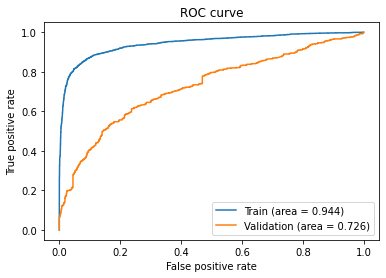

Epoch 1/5
381/381 [==============================] - 7s 16ms/step - loss: 0.7942
Epoch 2/5
381/381 [==============================] - 5s 14ms/step - loss: 0.5106
Epoch 3/5
381/381 [==============================] - 7s 18ms/step - loss: 0.4426
Epoch 4/5
381/381 [==============================] - 6s 14ms/step - loss: 0.4144
Epoch 5/5
48/48 [==============================] - 1s 10ms/step


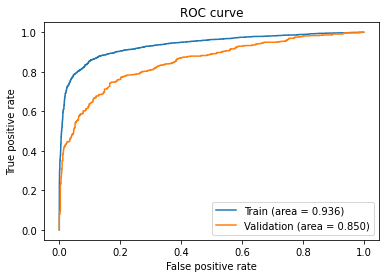

In [ ]:
# Now we will initialise the stratified K-Fold from sklearn with nsplits as 5
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Now Split the countvectors and target (y)
skf.get_n_splits(X,y)

# iterate through the train and valid index in splits for 5 folds

  # Get X_train, X_valid, y_train, y_valid using indexes
for train_index, valid_index in skf.split(X, y):
  X_train, X_valid = X[train_index], X[valid_index]
  y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

  X_train = X_train.toarray()
  # y_train = X_train.toarray()
  # X_valid = X_train.toarray()
  # y_valid = X_train.toarray()

  #call the build_model function and initialize the model
  model = build_model(X_train)

  # train and validate the model on the count vectors of text which we have created initially for 5 epochs, 
  # adjust batch size according to your computation power (suggestion use : 16)

  model.fit(X_train, y_train, batch_size=16, epochs=5)

  # plot the graph between training auc and validation auc
  from sklearn.metrics import roc_curve
  from sklearn.metrics import auc
  import matplotlib.pyplot as plt

  y_pred_keras = model.predict(X_train).ravel()
  fpr_keras_train, tpr_keras_train, thresholds_keras = roc_curve(y_train, y_pred_keras)
  auc_keras_train = auc(fpr_keras_train, tpr_keras_train)

  y_pred_keras = model.predict(X_valid.toarray()).ravel()
  fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_valid, y_pred_keras)
  auc_keras = auc(fpr_keras, tpr_keras)

  plt.figure(1)
  plt.plot(fpr_keras_train, tpr_keras_train, label='Train (area = {:.3f})'.format(auc_keras_train))
  plt.plot(fpr_keras, tpr_keras, label='Validation (area = {:.3f})'.format(auc_keras))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.show()

### Q) Comment on the plots. How did it varied across different folds for neural networks?

ANS:

Train accuracy was mostly the same across all folds, which is normal. THe validation accuracy varies more across different folds, which goes to show the importance of splitting up our data as train and test data. Certain train data may be more suitable for higher test accuracy, and in the case shown above, we can see we were able to reach the highest test accuracy of 0.850 and the lowest test accuracy of 0.697.

# Building Multinomial Navie Bayes on Countvectors

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


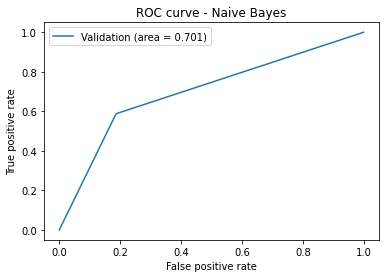

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


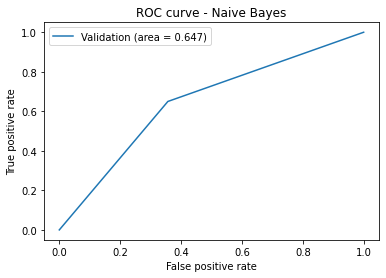

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


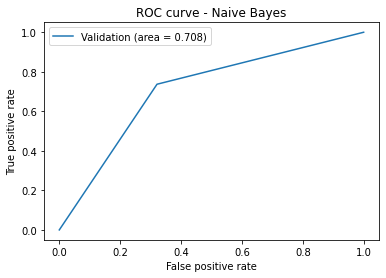

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


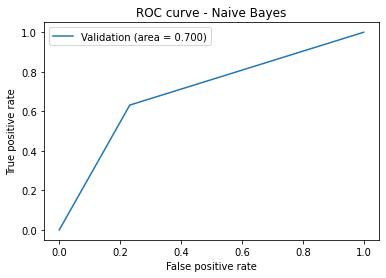

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


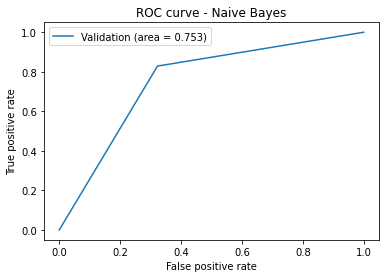

In [ ]:

from sklearn.naive_bayes import MultinomialNB
# iterate through the train and valid index in splits for 5 folds. Use the splits created above.

  # Get X_train, X_valid, y_train, y_valid using indexes
for train_index, valid_index in skf.split(X, y):
  X_train, X_valid = X[train_index], X[valid_index]
  y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

  # intialise multinomial navie bayes with default parameters

  clf = MultinomialNB()
  # fit the data
  clf.fit(X_train, y_train)
  
  # plot AUC-ROC curve for validation data
  y_pred_keras = clf.predict(X_valid).ravel()
  fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_valid, y_pred_keras)
  auc_keras = auc(fpr_keras, tpr_keras)

  plt.figure(1)
  plt.plot(fpr_keras, tpr_keras, label='Validation (area = {:.3f})'.format(auc_keras))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve - Naive Bayes')
  plt.legend(loc='best')
  plt.show()

### Q) Comment on the plots. How did it varied across different folds for Multinomial Naive Bayes?

ANS:

The validation accuracy varies more across different folds, which goes to show the importance of splitting up our data as train and test data. Certain train data may be more suitable for higher test accuracy, and in the case shown above, we can see we were able to reach the highest test accuracy of 0.753 and the lowest test accuracy of 0.647. Comparing this with the neural network, it is evident that the neural network may provide more accurate results than the Naive Bayes model, which had the highest test accuracy of 0.850.

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**

**Count Vectorizer:**

PRO
*   converts a given set of strings into a frequency representation

CON:
*   inability to identify more and less important words
*   abundant words are considered most statistically significant
*   doesn't identify relationships between words

**TFIDF:**

PRO

*  words that are too abundant or are too rare are both not statistically important for finding a pattern
* focuses on the frequency of words present in the corpus but also provides the importance of the words

CON

*   fails to provide information about the words like meaning of the words, similarity with other words 

**Word2Vec:**

PRO:

*   bring out the semantic similarity of words that captures different facets of the meaning of a word
*   relationship between words is derived by cosine distance between words
*   leverages co-occurance within local context (neighboring words)

CON:

*   unable to encode unknown or out-of-vocabulary words

**Glove:**

PRO:

*   bring out the semantic similarity of words that captures different facets of the meaning of a word
*   relationship between words is derived by cosine distance between words
*   leverages global word to word co-occurance counts (leveraging the entire corpus)

CON:

*   unable to encode unknown or out-of-vocabulary words

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**

The Bag of Words implementation creates a set of vectors containing the count of word occurrences in the document. The TF-IDF model contains information on the more important words and the less important words. The bag of words approach completely ignores the importance of a word within a sentence. The TF-IDF method is an alternative to the Bag of words method which holds the principle that a more frequent word within a document reduces its ability to be informative. The Naive Bayes model can use either of these methods and evaluate which way yields a higher accuracy.
